# Flu Shot Learning: Predict Seasonal Flu Vaccines

### Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation

The project is focus solely on predicting whether people got seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors.

### Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis

We will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

The CDC has other ongoing programs for annual phone surveys that continue to monitor seasonal flu vaccination.

The dataset has 31 features. For all binary variables: 0 = No; 1 = Yes.

The aim of this project is to find out based on the survey data collected, we can find out characteristics of people who are willing to get flu vaccine or not.

The features in this dataset:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|seasonal_vaccine |	Whether respondent received seasonal flu vaccine|
|respondent_id|	a unique and random identifier|
|behavioral_antiviral_meds|	Has taken antiviral medications. (binary)|
|behavioral_avoidance|	Has avoided close contact with others with flu-like symptoms. (binary)|
|behavioral_face_mask|	Has bought a face mask. (binary)|
|behavioral_wash_hands|	Has frequently washed hands or used hand sanitizer. (binary)|
|behavioral_large_gatherings|	Has reduced time at large gatherings. (binary)|
|behavioral_outside_home|	Has reduced contact with people outside of own household. (binary)|
|behavioral_touch_face|	Has avoided touching eyes, nose, or mouth. (binary)|
|doctor_recc_seasonal|	Seasonal flu vaccine was recommended by doctor. (binary)|
|chronic_med_condition|	Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)|
|child_under_6_months|	Has regular close contact with a child under the age of six months. (binary)|
|health_worker|	Is a healthcare worker. (binary)|
|health_insurance|	 Has health insurance. (binary)|
|opinion_seas_vacc_effective|	Respondent's opinion about seasonal flu vaccine effectiveness. 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
|
|opinion_seas_risk|	Respondent's opinion about risk of getting sick with seasonal flu without vaccine. 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
|
|opinion_seas_sick_from_vacc|	Respondent's worry of getting sick from taking seasonal flu vaccine. 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
|
|age_group|	Age group of respondent.|
|education|	Self-reported education level.|
|race|	Race of respondent.|
|sex|	Sex of respondent.|
|income_poverty|	Household annual income of respondent with respect to 2008 Census poverty thresholds.|
|marital_status|	Marital status of respondent.|
|employment_status|	Employment status of respondent.|
|hhs_geo_region|	Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.|
|census_msa|	Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.|
|household_adults|	Number of other adults in household, top-coded to 3.|
|household_children|	Number of children in household, top-coded to 3.|
|employment_industry|	Type of industry respondent is employed in. Values are represented as short random character strings.|
|employment_occupation|	Type of occupation of respondent. Values are represented as short random character strings.|


### Brief summary of data exploration and actions taken for data cleaning and feature engineering

Data Exploration includes data summary, statistics, create relevant graphs to find any relationships within.

As for data cleaning, we will check for missing values and decide what imputation method to be used. We also check for data duplicates.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

pd.options.display.max_columns= None
pd.options.display.max_rows = 40

In [2]:
df = pd.read_csv("training_set_features.csv")

In [3]:
df

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0
26703,26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0
26704,26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,1
26705,26705,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0


Dataset has 31 categorical features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_seasonal         24547 non-null  float64
 9   chronic_med_condition        25736 non-null  float64
 10  child_under_6_months         25887 non-null  float64
 11  health_worker                25903 non-null  float64
 12  health_insurance             14433 non-null  float64
 13  opinion_seas_vac

Summary of statistics below:

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
respondent_id,26707,NaN,NaN,NaN,13353,7709.79,0,6676.5,13353,20029.5,26706
behavioral_antiviral_meds,26636,NaN,NaN,NaN,0.0488437,0.215545,0,0,0,0,1
behavioral_avoidance,26499,NaN,NaN,NaN,0.725612,0.446214,0,0,1,1,1
behavioral_face_mask,26688,NaN,NaN,NaN,0.0689823,0.253429,0,0,0,0,1
behavioral_wash_hands,26665,NaN,NaN,NaN,0.825614,0.379448,0,1,1,1,1
behavioral_large_gatherings,26620,NaN,NaN,NaN,0.35864,0.47961,0,0,0,1,1
behavioral_outside_home,26625,NaN,NaN,NaN,0.337315,0.472802,0,0,0,1,1
behavioral_touch_face,26579,NaN,NaN,NaN,0.677264,0.467531,0,0,1,1,1
doctor_recc_seasonal,24547,NaN,NaN,NaN,0.329735,0.470126,0,0,0,1,1
chronic_med_condition,25736,NaN,NaN,NaN,0.283261,0.450591,0,0,0,1,1


Shape of dataset:

In [6]:
df.shape

(26707, 31)

In [7]:
df.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation',
       'seasonal_vaccine'],
      dtype='object')

### Data Exploration and Data Visualization

The dataset is mainly discrete/categorical types. Using Groupby Method to see certain selected categories:

In [8]:
df.groupby(by=["seasonal_vaccine"]).count()[["age_group","education","income_poverty",'hhs_geo_region',
                                            "census_msa",'employment_industry',"employment_occupation"]]

,age_group,education,income_poverty,hhs_geo_region,census_msa,employment_industry,employment_occupation
seasonal_vaccine,,,,,,,
0,14272,13407,11832,14272,14272,7715,7650
1,12435,11893,10452,12435,12435,5662,5587


In [9]:
df.groupby(by=["seasonal_vaccine","age_group"]).count()[["respondent_id"]]

respondent_id
seasonal_vaccine age_group                   
0                18 - 34 Years           3731
                 35 - 44 Years           2453
                 45 - 54 Years           3136
                 55 - 64 Years           2719
                 65+ Years               2233
1                18 - 34 Years           1484
                 35 - 44 Years           1395
                 45 - 54 Years           2102
                 55 - 64 Years           2844
                 65+ Years               4610

In [10]:
df.groupby(by=["seasonal_vaccine","education"]).count()[["respondent_id"]]

respondent_id
seasonal_vaccine education                      
0                12 Years                   3199
                 < 12 Years                 1415
                 College Graduate           4933
                 Some College               3860
1                12 Years                   2598
                 < 12 Years                  948
                 College Graduate           5164
                 Some College               3183

In [11]:
df.groupby(by=["seasonal_vaccine","income_poverty"]).count()[["respondent_id"]]

respondent_id
seasonal_vaccine income_poverty                          
0                <= $75,000, Above Poverty           6686
                 > $75,000                           3427
                 Below Poverty                       1719
1                <= $75,000, Above Poverty           6091
                 > $75,000                           3383
                 Below Poverty                        978

In [12]:
df.groupby(by=["seasonal_vaccine","hhs_geo_region"]).count()[["respondent_id"]]

respondent_id
seasonal_vaccine hhs_geo_region               
0                atmpeygn                 1031
                 bhuqouqj                 1433
                 dqpwygqj                  637
                 fpwskwrf                 1717
                 kbazzjca                 1482
                 lrircsnp                 1219
                 lzgpxyit                 2349
                 mlyzmhmf                 1235
                 oxchjgsf                 1520
                 qufhixun                 1649
1                atmpeygn                 1002
                 bhuqouqj                 1413
                 dqpwygqj                  489
                 fpwskwrf                 1548
                 kbazzjca                 1376
                 lrircsnp                  859
                 lzgpxyit                 1948
                 mlyzmhmf                 1008
                 oxchjgsf                 1339
                 qufhixun                 1453

In [13]:
df.groupby(by=["seasonal_vaccine","census_msa"]).count()[["respondent_id"]]

respondent_id
seasonal_vaccine census_msa                             
0                MSA, Not Principle  City           6076
                 MSA, Principle City                4296
                 Non-MSA                            3900
1                MSA, Not Principle  City           5569
                 MSA, Principle City                3568
                 Non-MSA                            3298

In [14]:
df.groupby(by=["seasonal_vaccine","employment_industry"]).count()[["respondent_id"]]

respondent_id
seasonal_vaccine employment_industry               
0                arjwrbjb                       470
                 atmlpfrs                       579
                 cfqqtusy                       207
                 dotnnunm                       130
                 fcxhlnwr                       893
...                                             ...
1                vjjrobsf                       163
                 wlfvacwt                        84
                 wxleyezf                       819
                 xicduogh                       205
                 xqicxuve                       163

[42 rows x 1 columns]

In [15]:
df.groupby(by=["seasonal_vaccine","employment_occupation"]).count()[["respondent_id"]]

respondent_id
seasonal_vaccine employment_occupation               
0                bxpfxfdn                         181
                 ccgxvspp                         221
                 cmhcxjea                         389
                 dcjcmpih                          23
                 dlvbwzss                         131
...                                               ...
1                vlluhbov                         127
                 xgwztkwe                         364
                 xqwwgdyp                         160
                 xtkaffoo                         744
                 xzmlyyjv                         117

[46 rows x 1 columns]

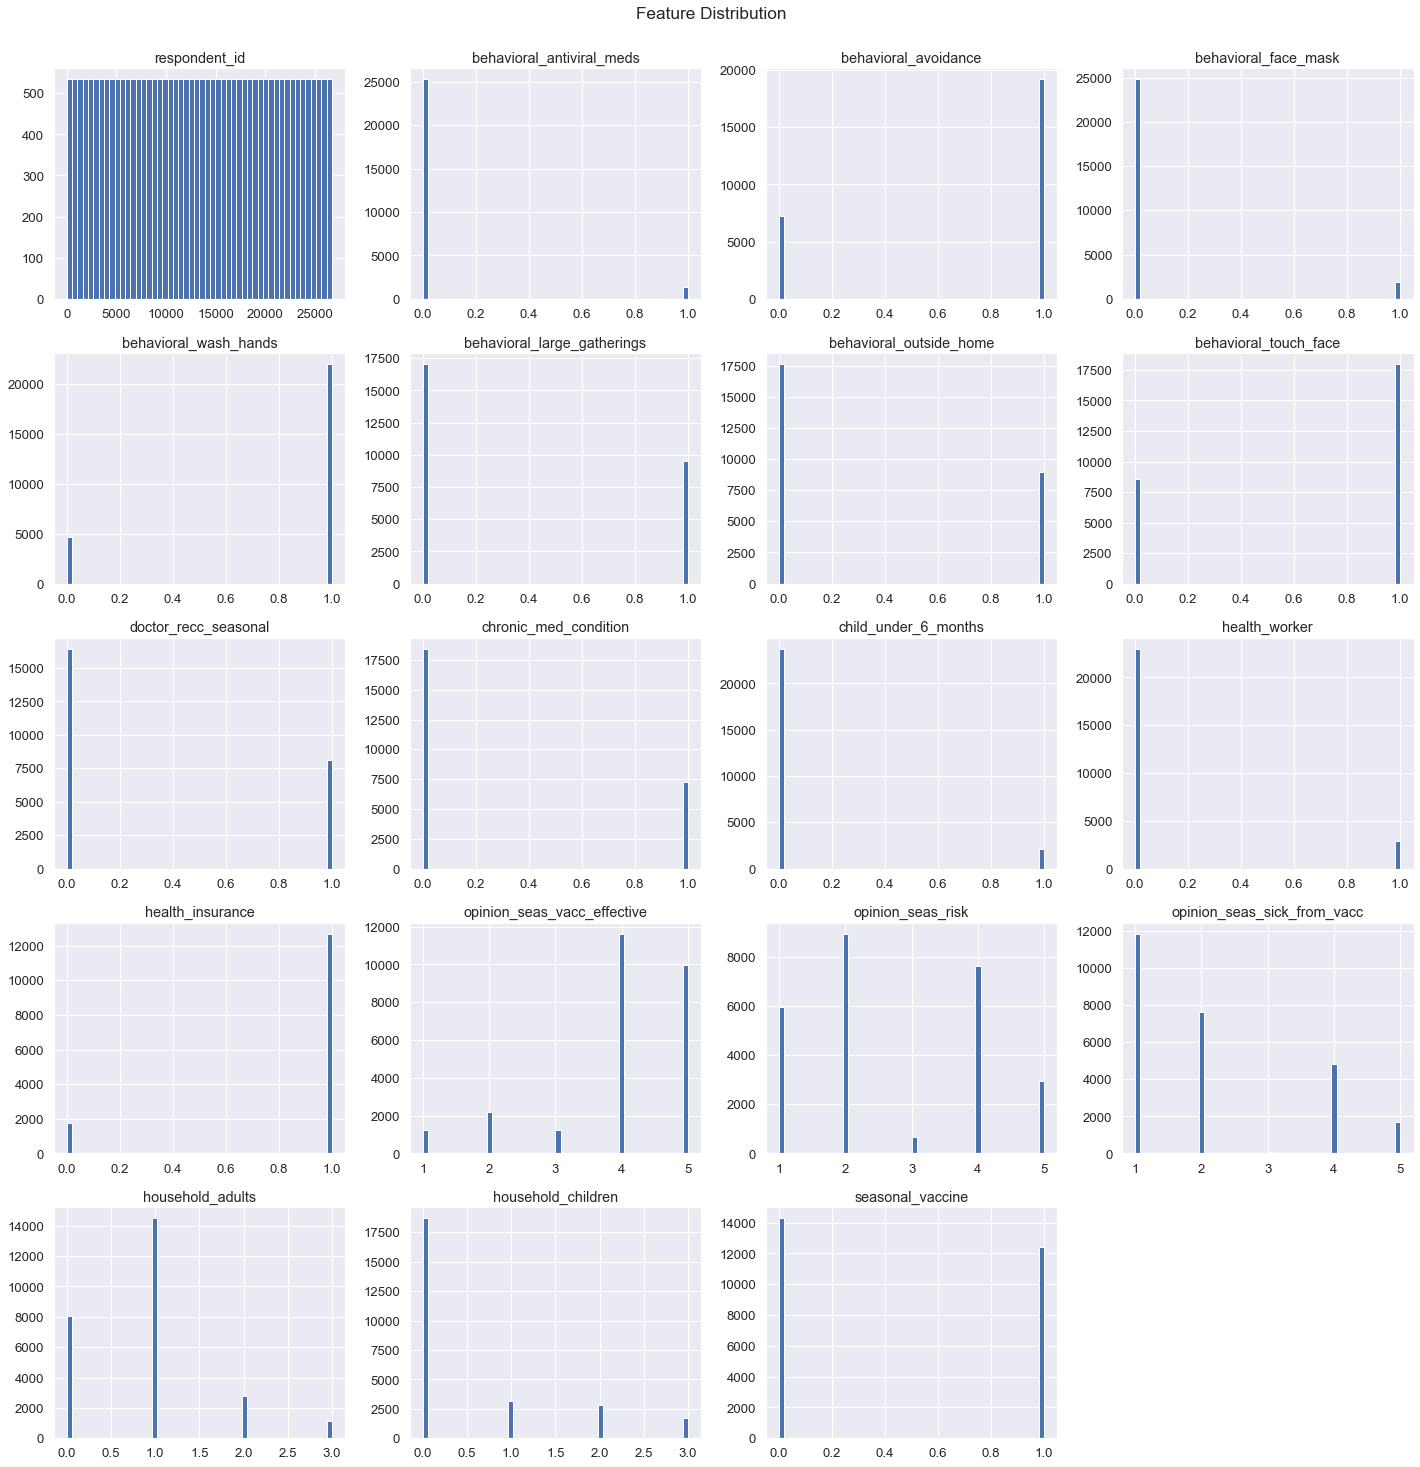

In [16]:
df.hist(bins=50, figsize=(20,20))

plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show();

These are individual countplots, due to height, there will be data analysis made in **three parts** separately.

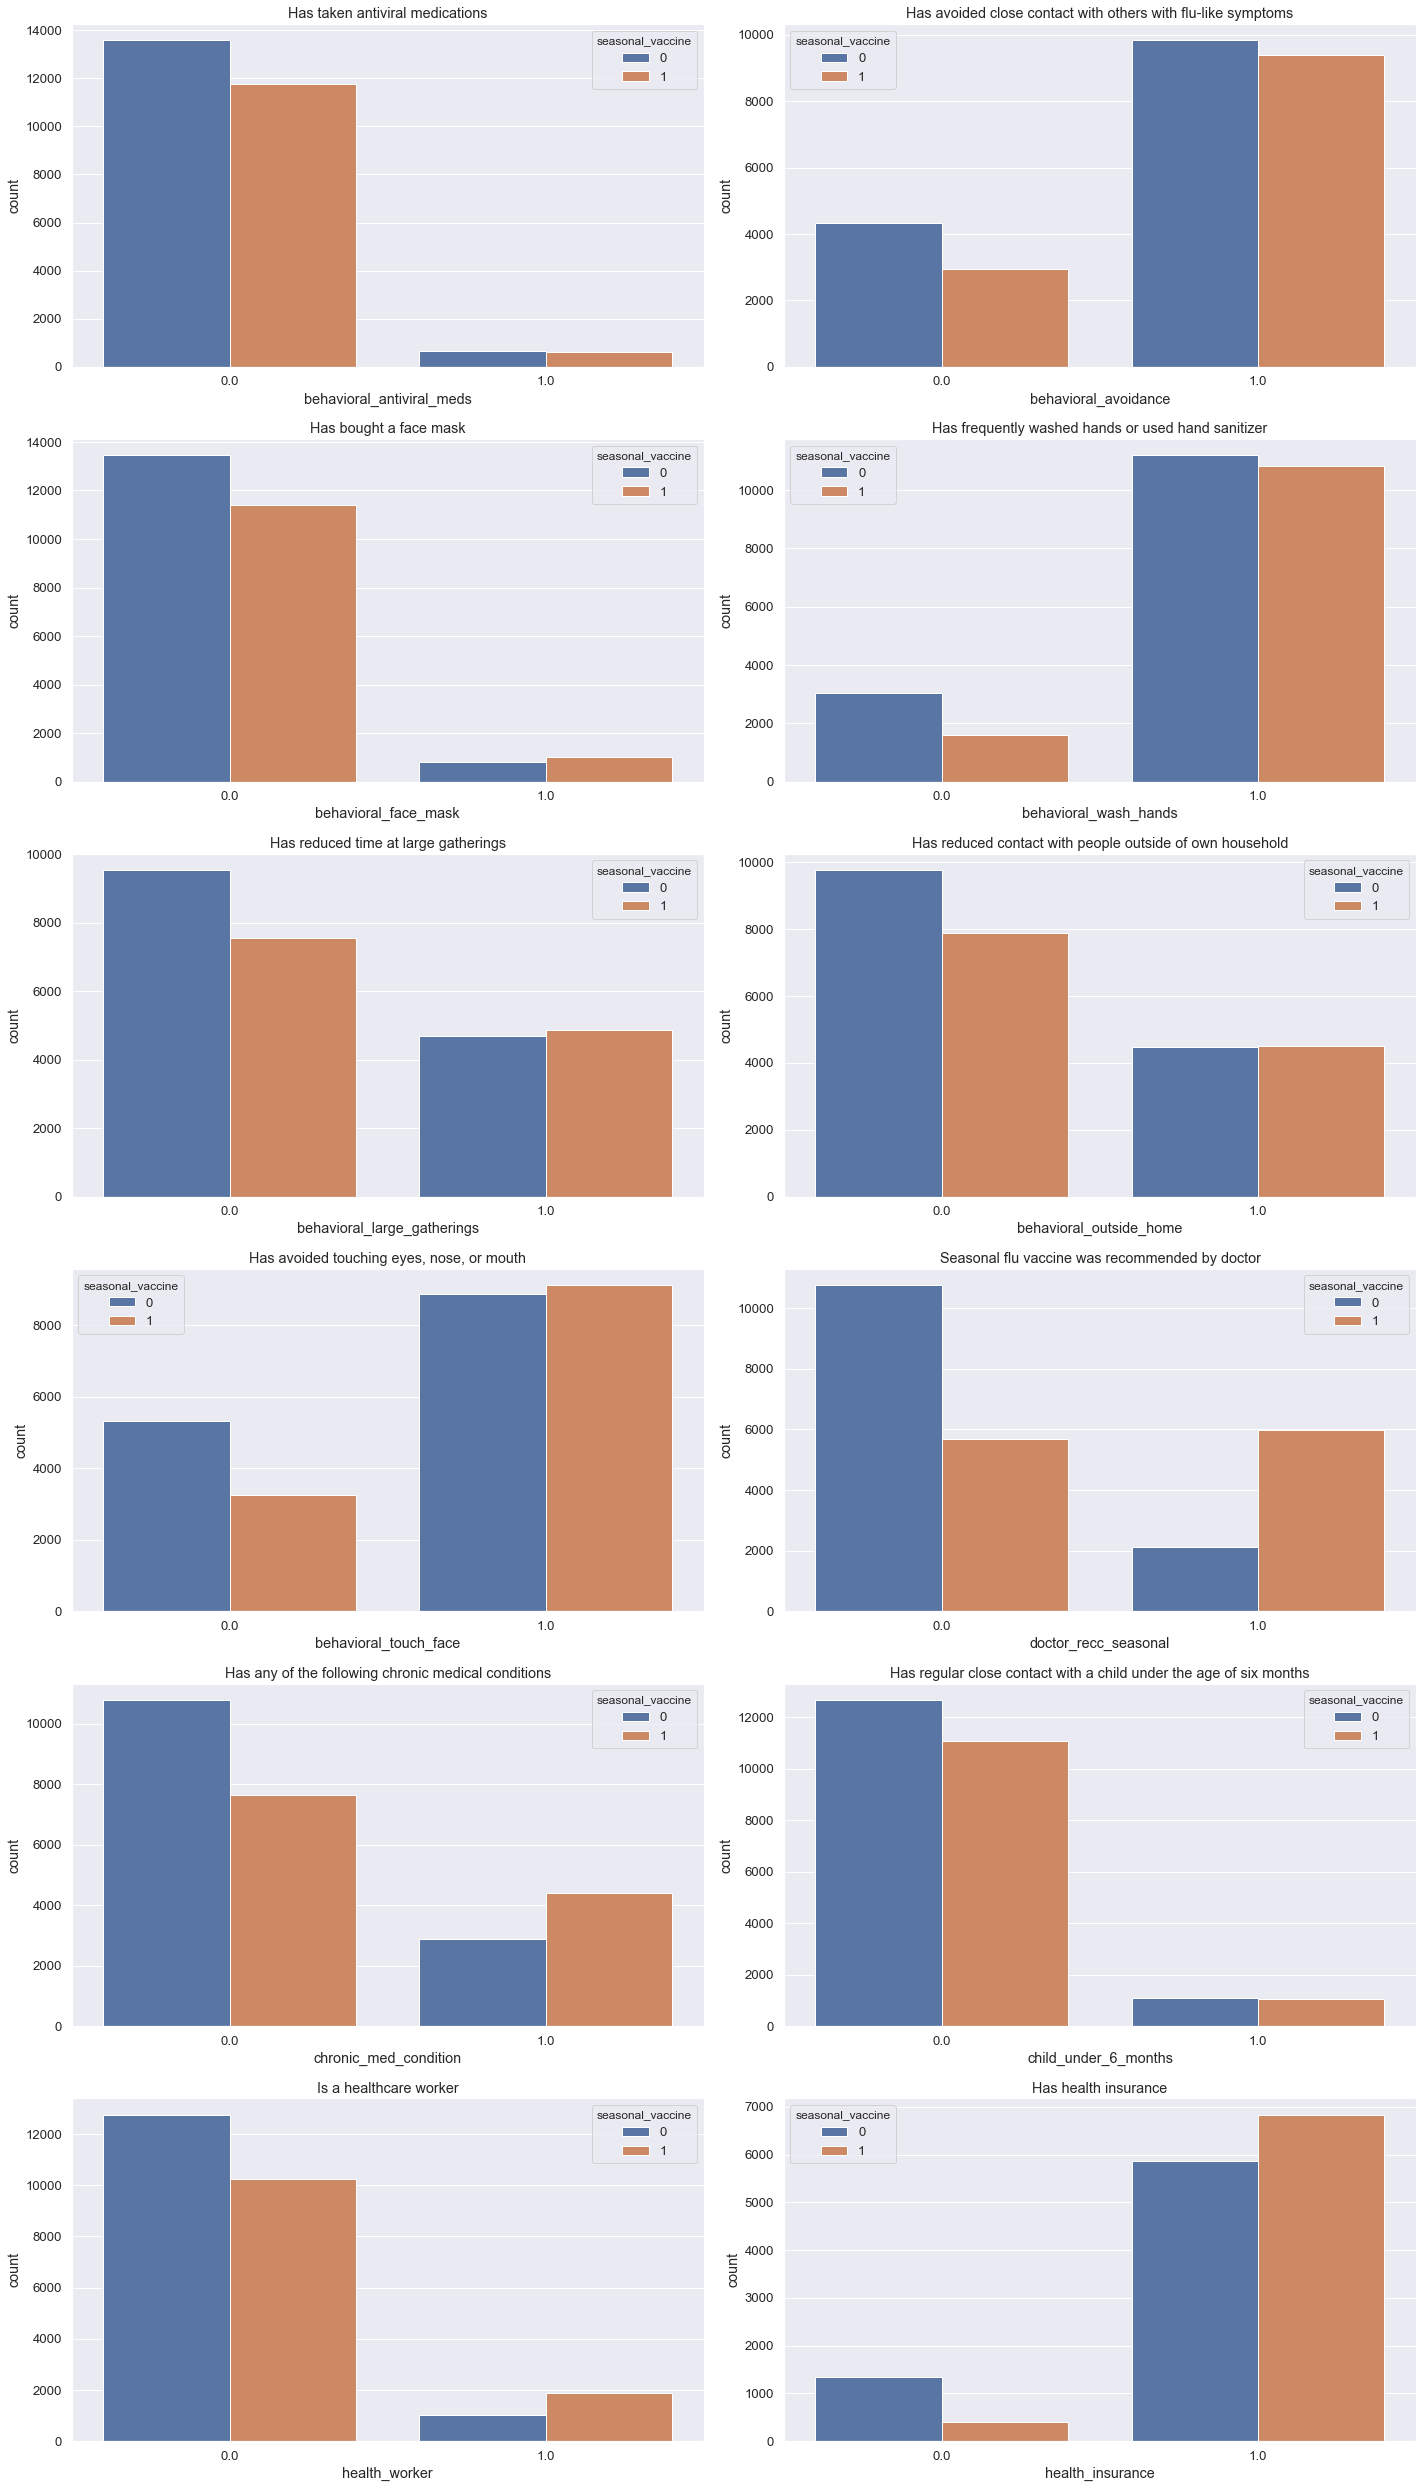

In [17]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("Has taken antiviral medications")
sns.countplot(df.behavioral_antiviral_meds, hue=df.seasonal_vaccine)

plt.subplot(7,2,2)
plt.title("Has avoided close contact with others with flu-like symptoms")
sns.countplot(df.behavioral_avoidance, hue=df.seasonal_vaccine)

plt.subplot(7,2,3)
plt.title("Has bought a face mask")
sns.countplot(df.behavioral_face_mask, hue=df.seasonal_vaccine)

plt.subplot(7,2,4)
plt.title("Has frequently washed hands or used hand sanitizer")
sns.countplot(df.behavioral_wash_hands, hue=df.seasonal_vaccine)

plt.subplot(7,2,5)
plt.title("Has reduced time at large gatherings")
sns.countplot(df.behavioral_large_gatherings, hue=df.seasonal_vaccine)

plt.subplot(7,2,6)
plt.title("Has reduced contact with people outside of own household")
sns.countplot(df.behavioral_outside_home, hue=df.seasonal_vaccine)

plt.subplot(7,2,7)
plt.title("Has avoided touching eyes, nose, or mouth")
sns.countplot(df.behavioral_touch_face, hue=df.seasonal_vaccine)

plt.subplot(7,2,8)
plt.title("Seasonal flu vaccine was recommended by doctor")
sns.countplot(df.doctor_recc_seasonal, hue=df.seasonal_vaccine)

plt.subplot(7,2,9)
plt.title("Has any of the following chronic medical conditions")
sns.countplot(df.chronic_med_condition, hue=df.seasonal_vaccine)

plt.subplot(7,2,10)
plt.title("Has regular close contact with a child under the age of six months")
sns.countplot(df.child_under_6_months, hue=df.seasonal_vaccine)

plt.subplot(7,2,11)
plt.title("Is a healthcare worker")
sns.countplot(df.health_worker, hue=df.seasonal_vaccine)

plt.subplot(7,2,12)
plt.title("Has health insurance")
sns.countplot(df.health_insurance, hue=df.seasonal_vaccine)


plt.tight_layout()
plt.show()

**Part 1 of Data Analysis:**

Those who had vaccine avoided close contacts which is surprising since vaccines are supposed to protect them. But they didn't avoid large gatherings.

As for flu vaccine which doctor recommended, there is such acceptance among people.

Health Care workers are most vulnerable but majority of them do vaccinate.

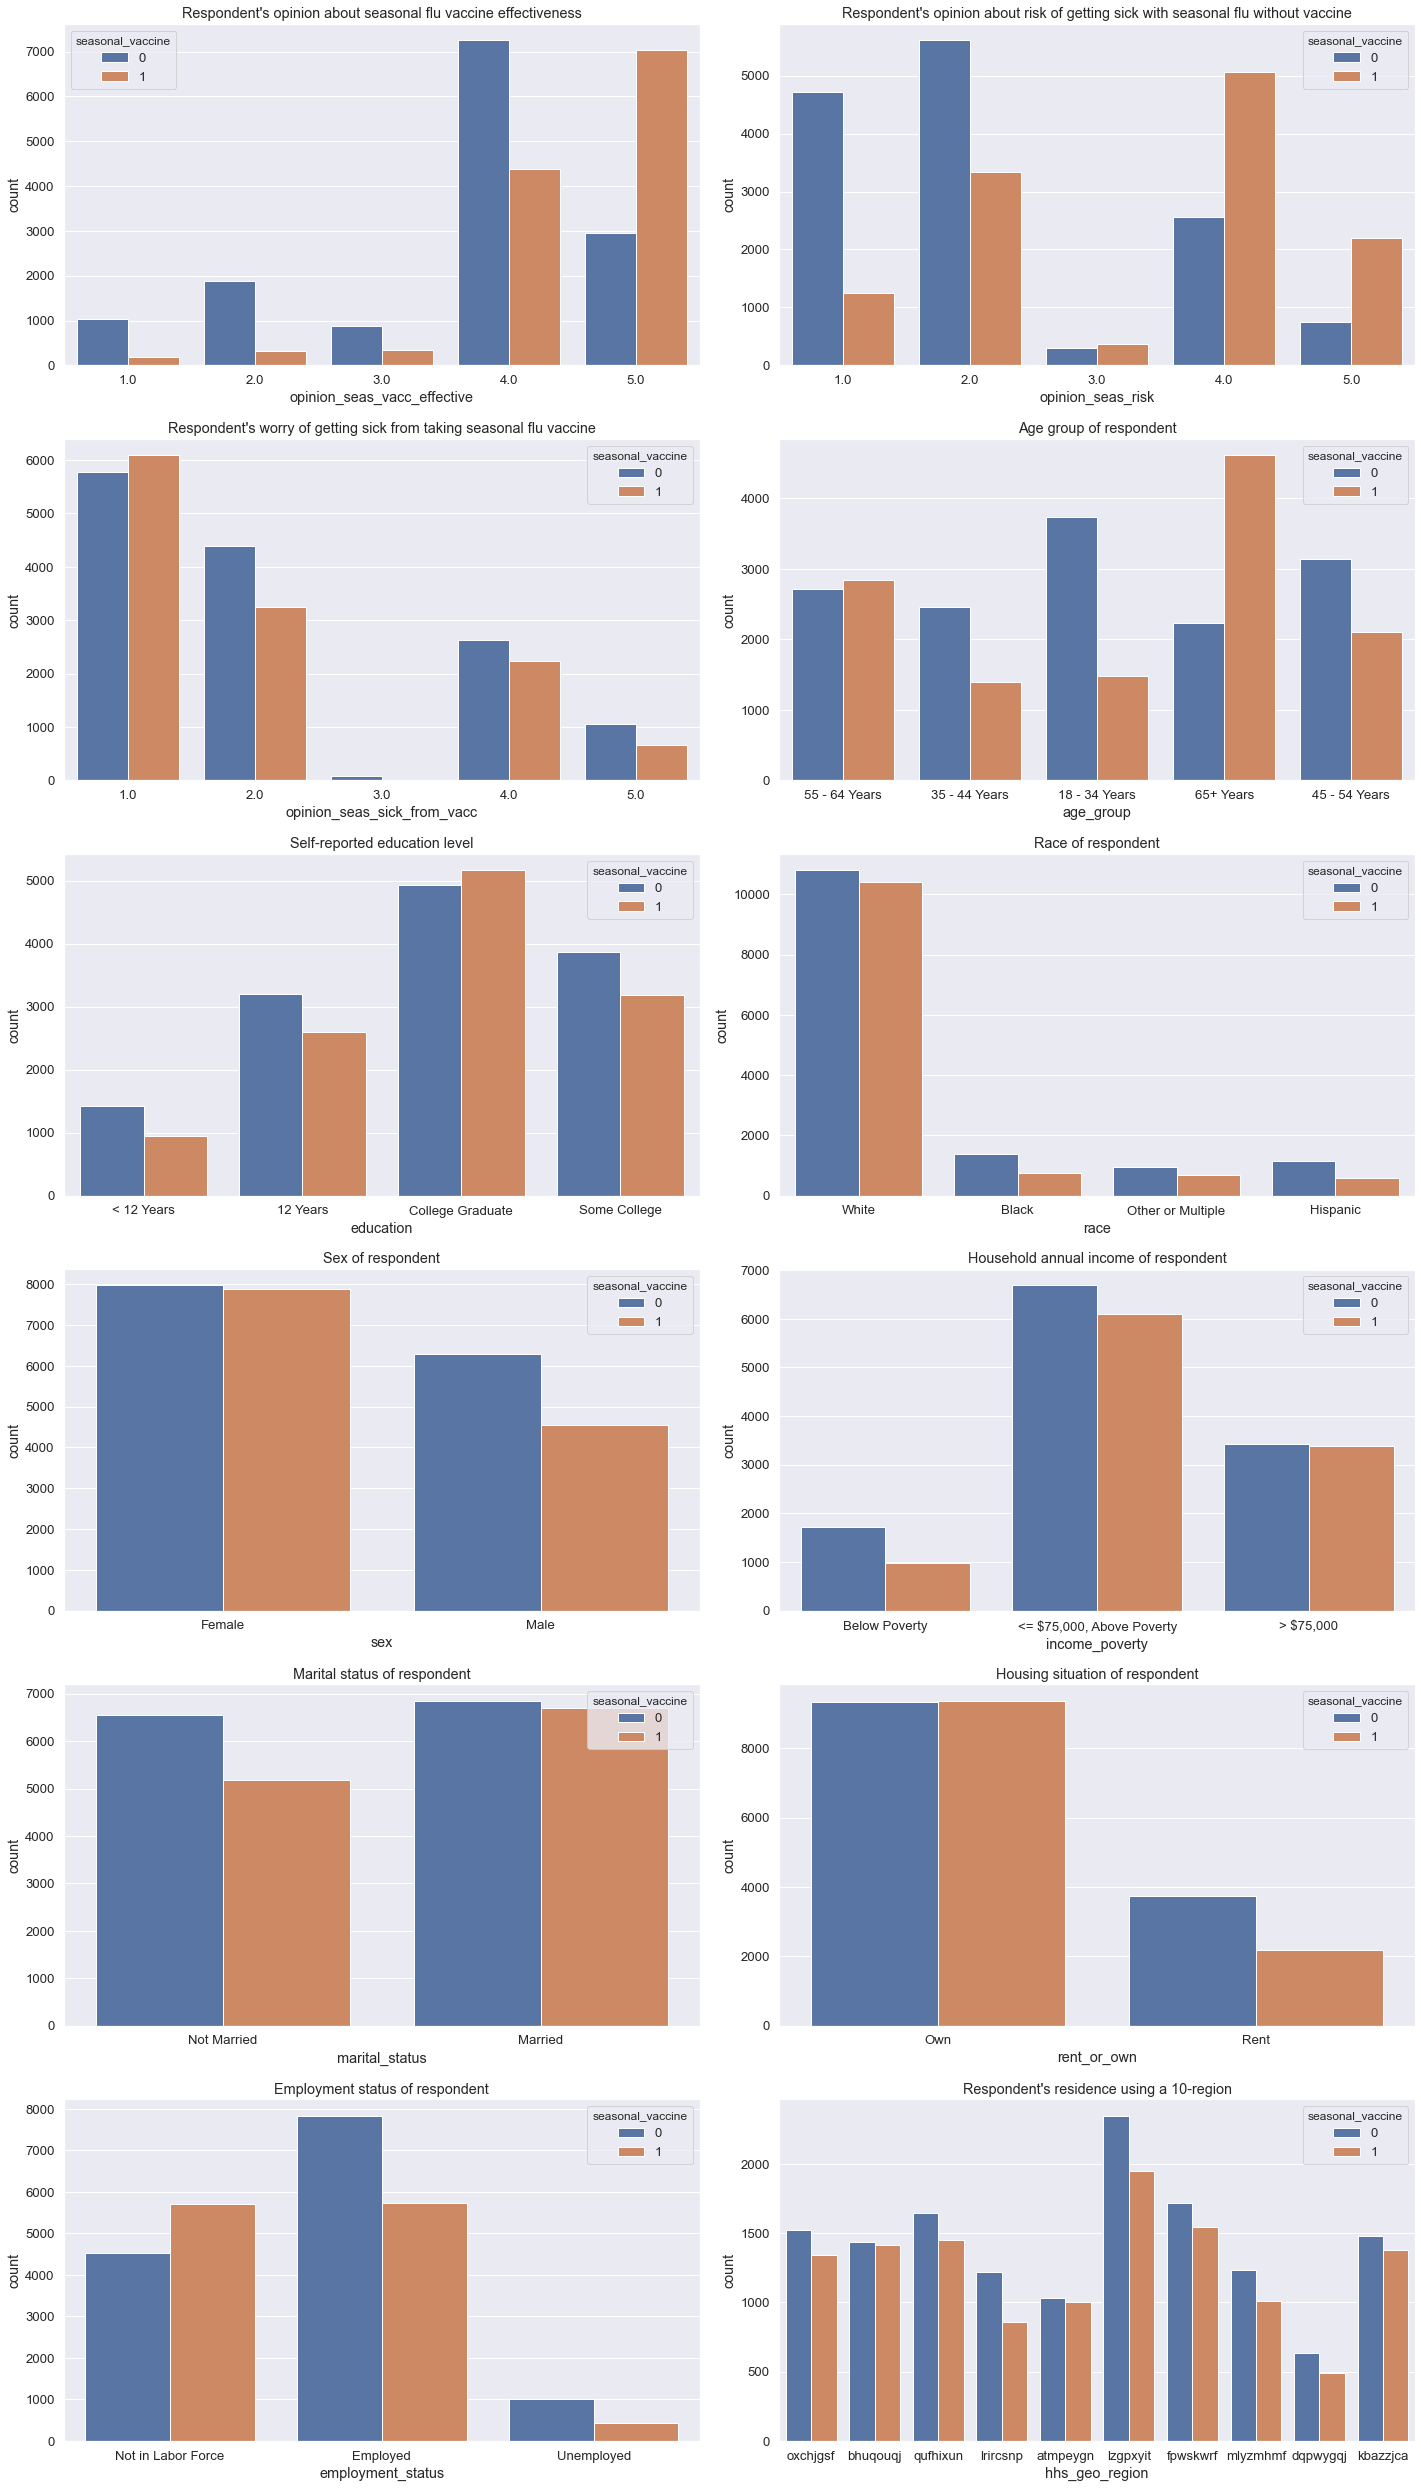

In [18]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("Respondent's opinion about seasonal flu vaccine effectiveness")
sns.countplot(df.opinion_seas_vacc_effective, hue=df.seasonal_vaccine)

plt.subplot(7,2,2)
plt.title("Respondent's opinion about risk of getting sick with seasonal flu without vaccine")
sns.countplot(df.opinion_seas_risk, hue=df.seasonal_vaccine)

plt.subplot(7,2,3)
plt.title("Respondent's worry of getting sick from taking seasonal flu vaccine")
sns.countplot(df.opinion_seas_sick_from_vacc, hue=df.seasonal_vaccine)

plt.subplot(7,2,4)
plt.title("Age group of respondent")
sns.countplot(df.age_group, hue=df.seasonal_vaccine)

plt.subplot(7,2,5)
plt.title("Self-reported education level")
sns.countplot(df.education, hue=df.seasonal_vaccine)

plt.subplot(7,2,6)
plt.title("Race of respondent")
sns.countplot(df.race, hue=df.seasonal_vaccine)

plt.subplot(7,2,7)
plt.title("Sex of respondent")
sns.countplot(df.sex, hue=df.seasonal_vaccine)

plt.subplot(7,2,8)
plt.title("Household annual income of respondent")
sns.countplot(df.income_poverty, hue=df.seasonal_vaccine)

plt.subplot(7,2,9)
plt.title("Marital status of respondent")
sns.countplot(df.marital_status, hue=df.seasonal_vaccine)

plt.subplot(7,2,10)
plt.title("Housing situation of respondent")
sns.countplot(df.rent_or_own, hue=df.seasonal_vaccine)

plt.subplot(7,2,11)
plt.title("Employment status of respondent")
sns.countplot(df.employment_status, hue=df.seasonal_vaccine)

plt.subplot(7,2,12)
plt.title("Respondent's residence using a 10-region")
sns.countplot(df.hhs_geo_region, hue=df.seasonal_vaccine)



plt.tight_layout()
plt.show()

**Part 2 of Data Analysis:**
    
As for respondents opinion, risks and worry, there are no surprises for those who trust flu vaccines.

Respondents more than age 65 and College Educated are vaccinated.

Mainly whites, female, more than 75k income, married, own a house and employed can afford flu vaccines.

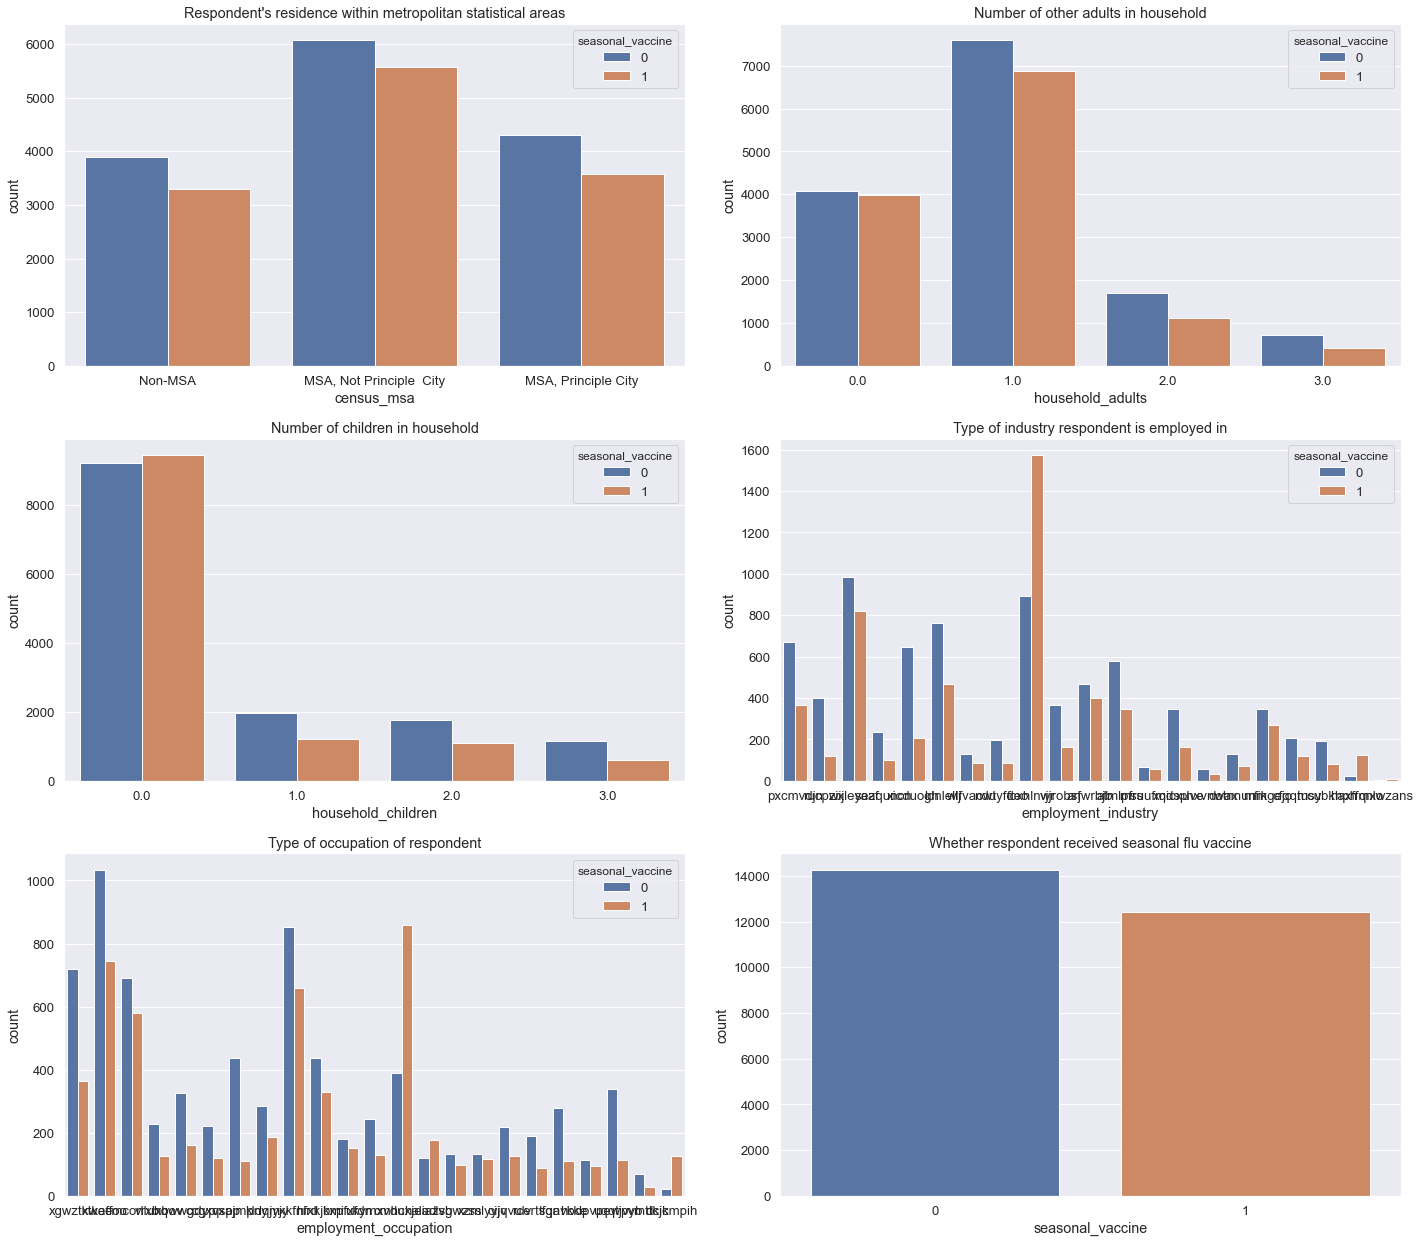

In [19]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("Respondent's residence within metropolitan statistical areas")
sns.countplot(df.census_msa, hue=df.seasonal_vaccine)

plt.subplot(7,2,2)
plt.title("Number of other adults in household")
sns.countplot(df.household_adults, hue=df.seasonal_vaccine)

plt.subplot(7,2,3)
plt.title("Number of children in household")
sns.countplot(df.household_children, hue=df.seasonal_vaccine)

plt.subplot(7,2,4)
plt.title("Type of industry respondent is employed in")
sns.countplot(df.employment_industry, hue=df.seasonal_vaccine)

plt.subplot(7,2,5)
plt.title("Type of occupation of respondent")
sns.countplot(df.employment_occupation, hue=df.seasonal_vaccine)

plt.subplot(7,2,6)
plt.title("Whether respondent received seasonal flu vaccine")
sns.countplot(df.seasonal_vaccine)


plt.tight_layout()
plt.show()

**Part 3 of Data Analysis:**

City dwellers, one household adults and no children mainly are vaccinated.

Unknown employment industry and occupation type is masked/not revealed to us.

As for seasonal vaccine, both are more or less equal quantity.

In [20]:
df['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

Now we check any correlation between features:

In [21]:
df.corr()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,seasonal_vaccine
respondent_id,1.000000,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,0.001500,0.005797,-0.004839,-0.003149,-0.012603,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.004652
behavioral_antiviral_meds,-0.008475,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.030909,0.008465,0.028788,0.009465,-0.063988,0.015003,0.085315,0.084305,0.044900,0.084822,0.006277
behavioral_avoidance,0.009638,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.074088,0.039435,-0.000414,0.001180,0.032662,0.119554,0.129504,0.082942,0.019122,0.040328,0.076395
behavioral_face_mask,-0.006644,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.069481,0.068113,0.039726,0.069992,-0.040257,0.041556,0.110161,0.090009,0.013991,0.005826,0.050083
behavioral_wash_hands,0.011105,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.102044,0.030260,0.036188,0.053761,0.031919,0.138517,0.172464,0.088029,0.009669,0.047764,0.112414
behavioral_large_gatherings,0.004539,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.093557,0.104721,0.021168,-0.032319,-0.059000,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.064025
behavioral_outside_home,0.009011,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.085622,0.098858,0.018195,-0.034619,-0.061381,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.053509
behavioral_touch_face,0.007575,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.100808,0.028876,0.026640,0.067648,0.011024,0.105798,0.143735,0.090097,-0.000553,0.023606,0.120228
doctor_recc_seasonal,0.001500,0.030909,0.074088,0.069481,0.102044,0.093557,0.085622,0.100808,1.000000,0.213806,0.036832,0.059402,0.117195,0.180902,0.240087,0.025356,-0.040769,-0.048380,0.369190
chronic_med_condition,0.005797,0.008465,0.039435,0.068113,0.030260,0.104721,0.098858,0.028876,0.213806,1.000000,-0.001349,-0.026481,0.066088,0.091737,0.162061,0.052587,-0.071346,-0.108237,0.170174


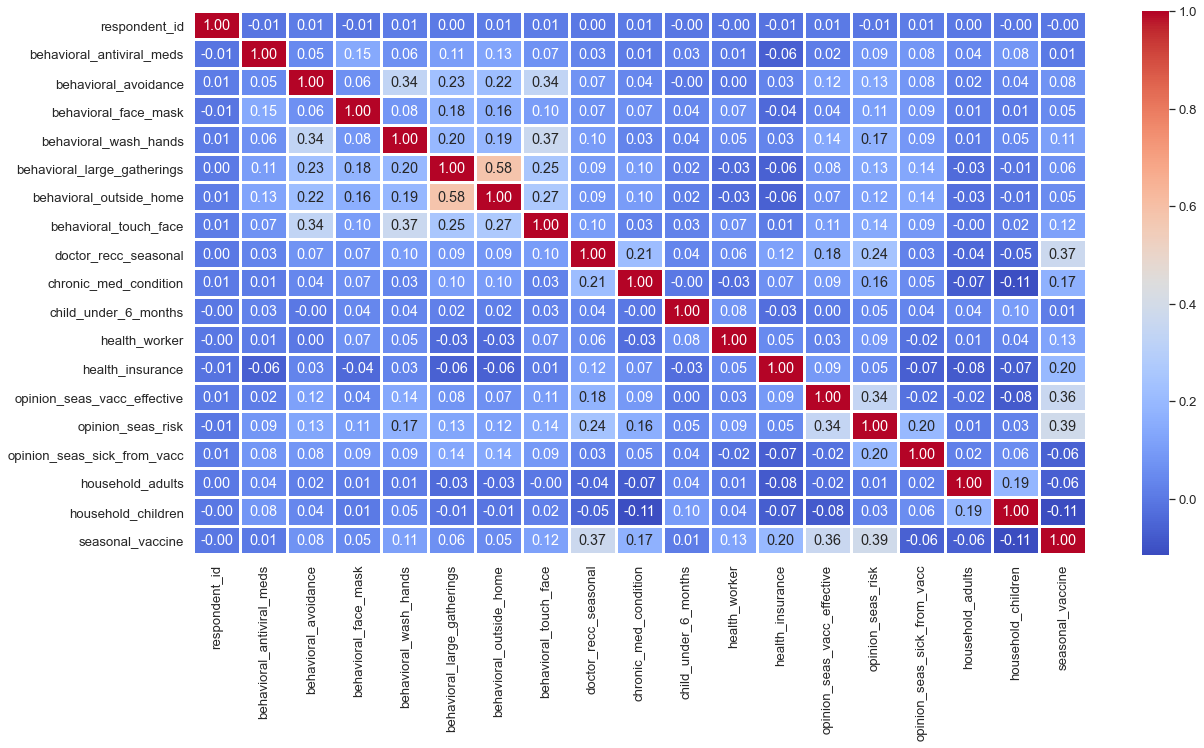

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

**Quote:**
    
"Factors that may bias the results of observational studies can be broadly categorized as: selection bias resulting from the way study subjects are recruited or from differing rates of study participation depending on the subjects’ cultural background, age, or socioeconomic status, information bias, measurement error, confounders, and further factors."

We will drop a number of features which we think that will make the model biased to a certain group/gender/income/social.

### Drop unwanted features

In [23]:
df.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation',
       'seasonal_vaccine'],
      dtype='object')

In [24]:
df.drop(['respondent_id','health_insurance','age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 
         'employment_status','hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 
          'employment_occupation'],axis=1,inplace=True)

In [25]:
df

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,4.0,1.0,2.0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,1.0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,0
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,0
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,1
26705,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0


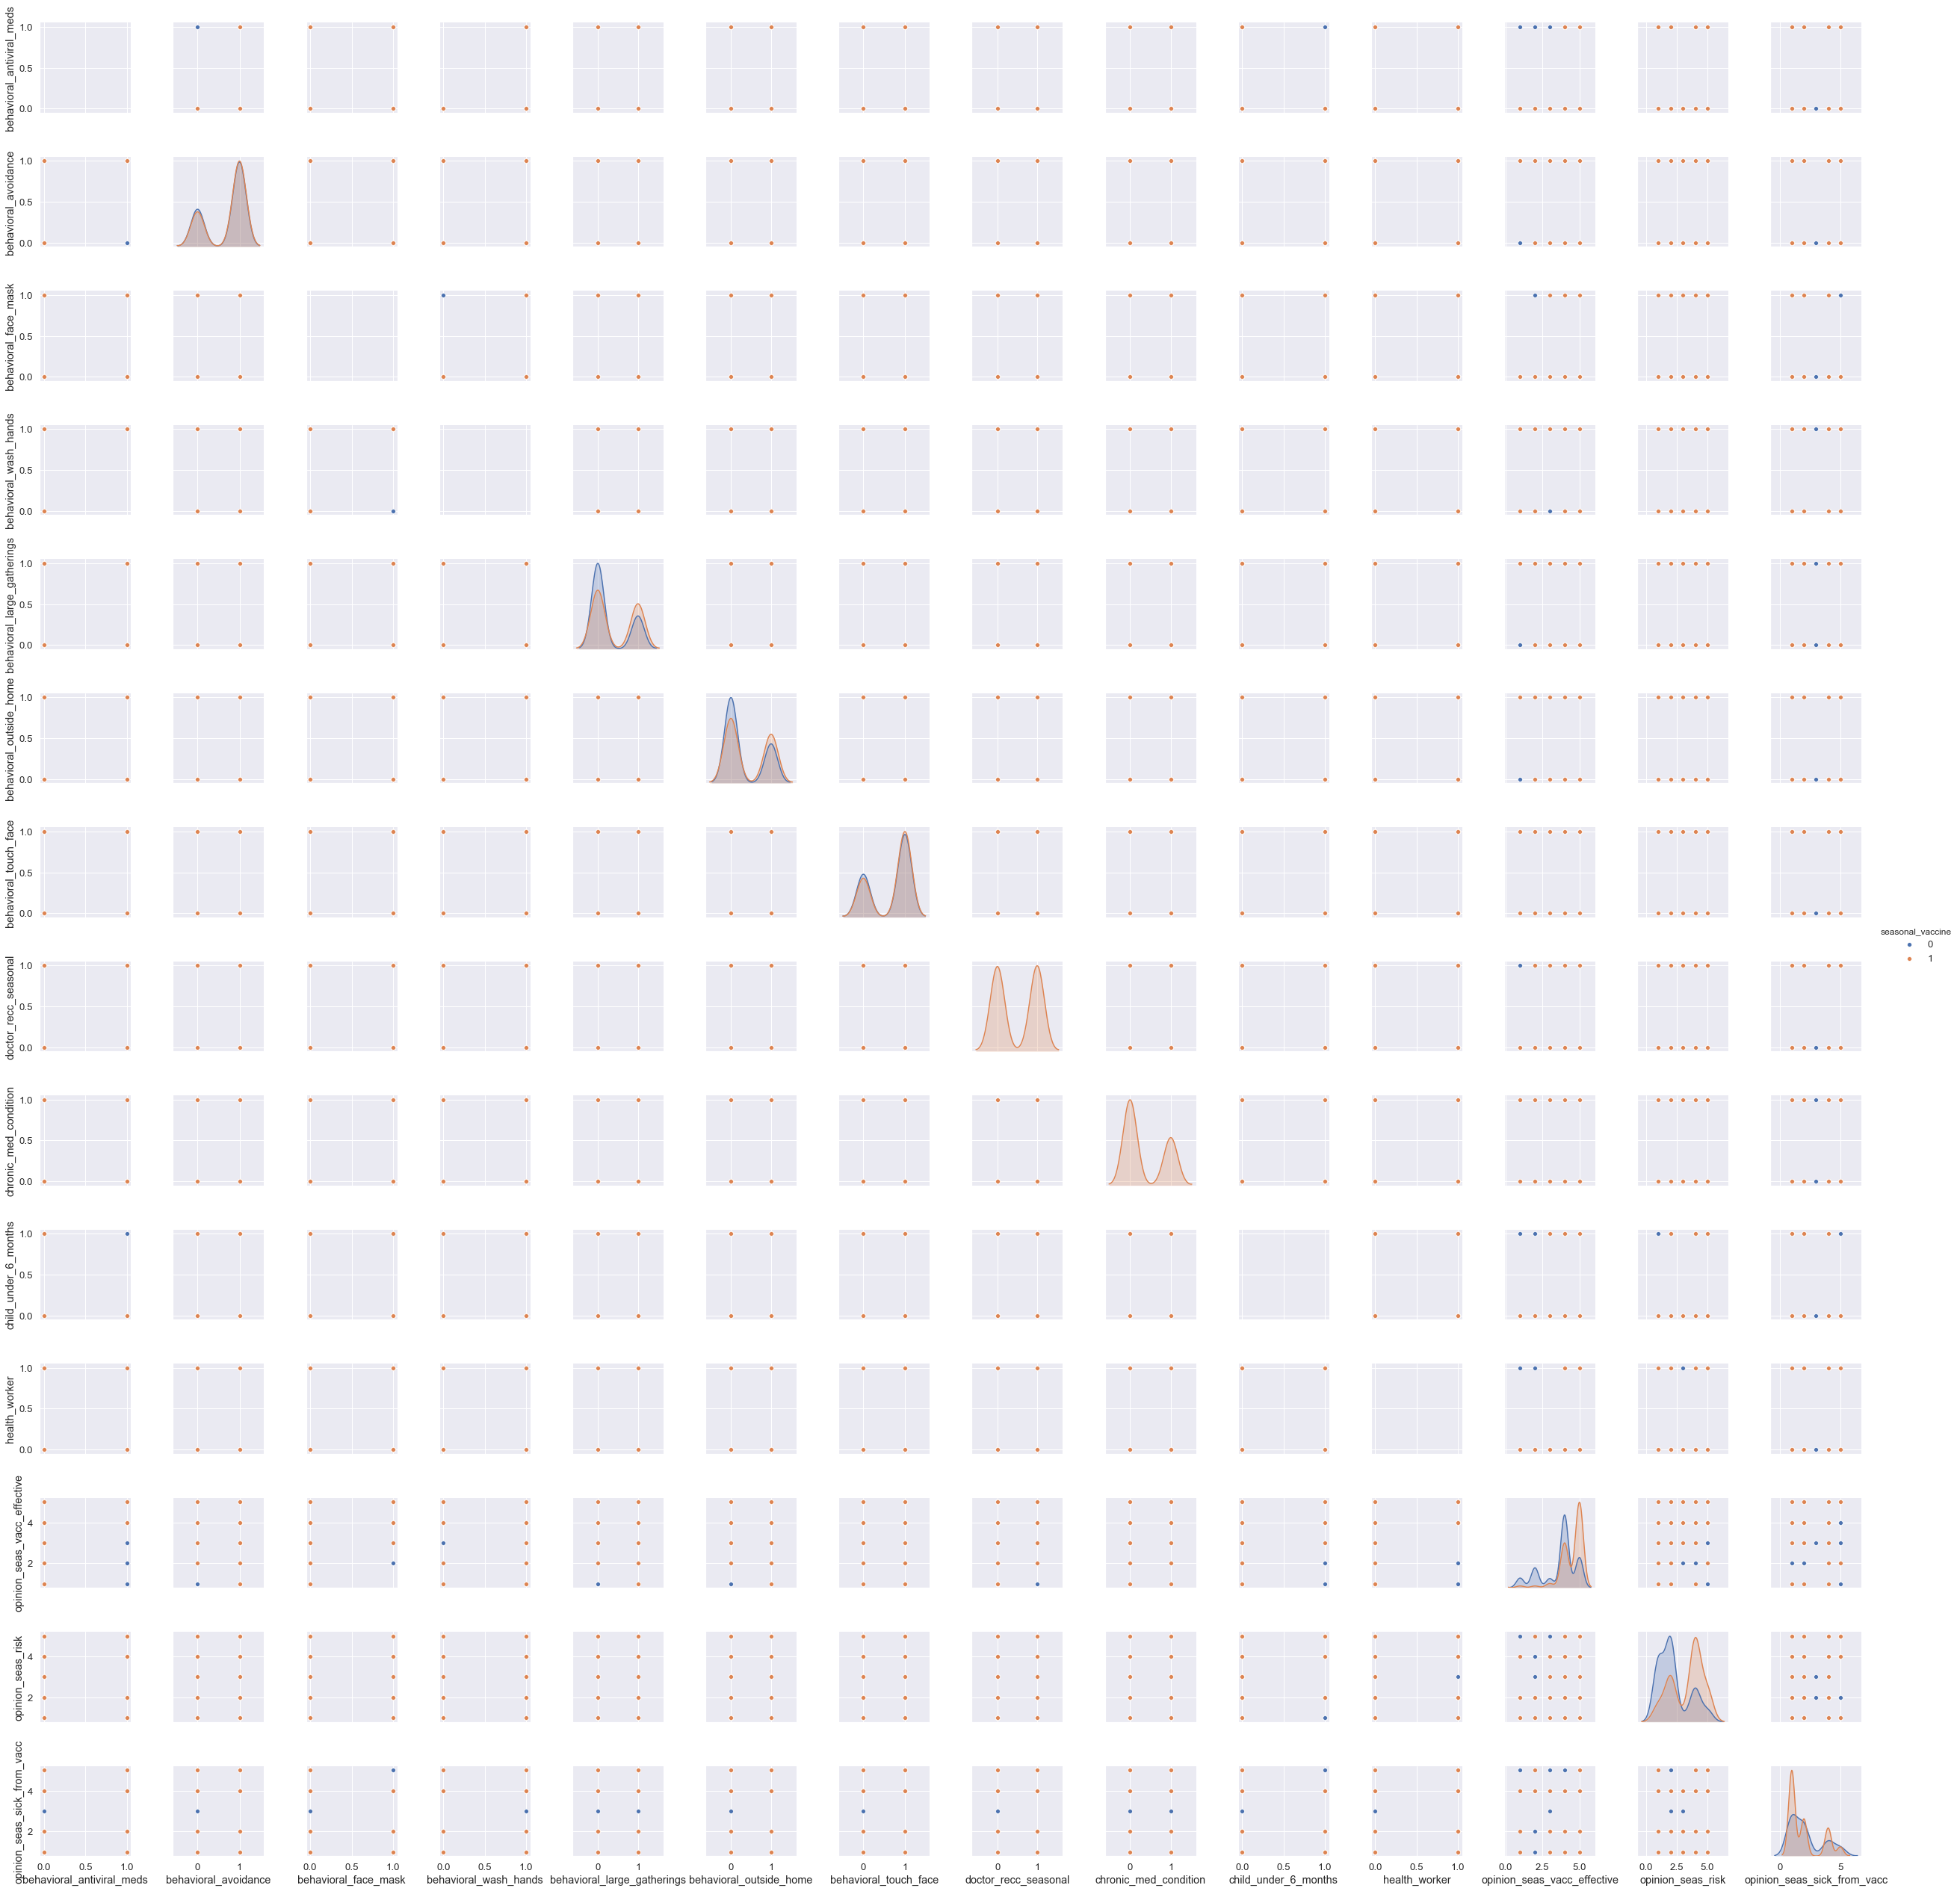

In [26]:
sns.pairplot(df.sample(500), hue='seasonal_vaccine')
plt.show()

### Treat Missing Values

In [27]:
df.isnull().sum()

behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
seasonal_vaccine                  0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
seasonal_vaccine               0
dtype: int64

In [30]:
df.reset_index(drop=True,inplace=True)

In [31]:
df

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,1
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,1.0,1
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,2.0,4.0,0
23184,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,0
23185,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,0
23186,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,1


In [32]:
df['seasonal_vaccine'].value_counts()

0    12111
1    11077
Name: seasonal_vaccine, dtype: int64

### Data Type change for faster computation

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23188 entries, 0 to 23187
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    23188 non-null  float64
 1   behavioral_avoidance         23188 non-null  float64
 2   behavioral_face_mask         23188 non-null  float64
 3   behavioral_wash_hands        23188 non-null  float64
 4   behavioral_large_gatherings  23188 non-null  float64
 5   behavioral_outside_home      23188 non-null  float64
 6   behavioral_touch_face        23188 non-null  float64
 7   doctor_recc_seasonal         23188 non-null  float64
 8   chronic_med_condition        23188 non-null  float64
 9   child_under_6_months         23188 non-null  float64
 10  health_worker                23188 non-null  float64
 11  opinion_seas_vacc_effective  23188 non-null  float64
 12  opinion_seas_risk            23188 non-null  float64
 13  opinion_seas_sic

In [34]:
df = df.astype('int8')  #Change to integer type

In [35]:
df.dtypes

behavioral_antiviral_meds      int8
behavioral_avoidance           int8
behavioral_face_mask           int8
behavioral_wash_hands          int8
behavioral_large_gatherings    int8
behavioral_outside_home        int8
behavioral_touch_face          int8
doctor_recc_seasonal           int8
chronic_med_condition          int8
child_under_6_months           int8
health_worker                  int8
opinion_seas_vacc_effective    int8
opinion_seas_risk              int8
opinion_seas_sick_from_vacc    int8
seasonal_vaccine               int8
dtype: object

In [36]:
df

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,seasonal_vaccine
0,0,0,0,0,0,1,1,0,0,0,0,2,1,2,0
1,0,1,0,1,0,1,1,0,0,0,0,4,2,4,1
2,0,1,0,1,1,0,0,1,1,0,0,5,4,1,1
3,0,1,0,1,1,0,1,0,0,0,0,3,1,4,0
4,0,1,0,1,0,0,1,1,0,0,0,5,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0,0,0,1,0,0,1,0,0,1,0,4,2,4,0
23184,0,1,0,0,0,1,0,0,0,0,0,5,2,2,0
23185,0,1,0,1,0,0,0,1,0,0,1,5,1,1,0
23186,0,1,1,1,1,0,1,0,0,0,0,5,4,2,1


In [37]:
df.describe()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,seasonal_vaccine
count,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000
mean,0.049336,0.731197,0.068139,0.829481,0.358289,0.336855,0.684319,0.331335,0.284199,0.084009,0.113723,4.038166,2.730680,2.115577,0.477704
std,0.216573,0.443347,0.251989,0.376096,0.479508,0.472645,0.464796,0.470703,0.451042,0.277407,0.317481,1.078839,1.388191,1.332636,0.499513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000


In [38]:
df['opinion_seas_vacc_effective'] = df['opinion_seas_vacc_effective'].astype('object')

In [39]:
df['opinion_seas_risk'] = df['opinion_seas_risk'].astype('object')

In [40]:
df['opinion_seas_sick_from_vacc'] = df['opinion_seas_sick_from_vacc'].astype('object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23188 entries, 0 to 23187
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   behavioral_antiviral_meds    23188 non-null  int8  
 1   behavioral_avoidance         23188 non-null  int8  
 2   behavioral_face_mask         23188 non-null  int8  
 3   behavioral_wash_hands        23188 non-null  int8  
 4   behavioral_large_gatherings  23188 non-null  int8  
 5   behavioral_outside_home      23188 non-null  int8  
 6   behavioral_touch_face        23188 non-null  int8  
 7   doctor_recc_seasonal         23188 non-null  int8  
 8   chronic_med_condition        23188 non-null  int8  
 9   child_under_6_months         23188 non-null  int8  
 10  health_worker                23188 non-null  int8  
 11  opinion_seas_vacc_effective  23188 non-null  object
 12  opinion_seas_risk            23188 non-null  object
 13  opinion_seas_sick_from_vacc  23

### Create dummy variables

In [42]:
df2 = pd.get_dummies(data=df, drop_first=True)

In [43]:
df2

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,seasonal_vaccine,opinion_seas_vacc_effective_2,opinion_seas_vacc_effective_3,opinion_seas_vacc_effective_4,opinion_seas_vacc_effective_5,opinion_seas_risk_2,opinion_seas_risk_3,opinion_seas_risk_4,opinion_seas_risk_5,opinion_seas_sick_from_vacc_2,opinion_seas_sick_from_vacc_3,opinion_seas_sick_from_vacc_4,opinion_seas_sick_from_vacc_5
0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
2,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
23184,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
23185,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
23186,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0


In [44]:
df2.columns

Index(['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'seasonal_vaccine', 'opinion_seas_vacc_effective_2',
       'opinion_seas_vacc_effective_3', 'opinion_seas_vacc_effective_4',
       'opinion_seas_vacc_effective_5', 'opinion_seas_risk_2',
       'opinion_seas_risk_3', 'opinion_seas_risk_4', 'opinion_seas_risk_5',
       'opinion_seas_sick_from_vacc_2', 'opinion_seas_sick_from_vacc_3',
       'opinion_seas_sick_from_vacc_4', 'opinion_seas_sick_from_vacc_5'],
      dtype='object')

In [45]:
df2 = df2[['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_seas_vacc_effective_2',
       'opinion_seas_vacc_effective_3', 'opinion_seas_vacc_effective_4',
       'opinion_seas_vacc_effective_5', 'opinion_seas_risk_2',
       'opinion_seas_risk_3', 'opinion_seas_risk_4', 'opinion_seas_risk_5',
       'opinion_seas_sick_from_vacc_2', 'opinion_seas_sick_from_vacc_3',
       'opinion_seas_sick_from_vacc_4', 'opinion_seas_sick_from_vacc_5','seasonal_vaccine' ]]

In [46]:
df2

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective_2,opinion_seas_vacc_effective_3,opinion_seas_vacc_effective_4,opinion_seas_vacc_effective_5,opinion_seas_risk_2,opinion_seas_risk_3,opinion_seas_risk_4,opinion_seas_risk_5,opinion_seas_sick_from_vacc_2,opinion_seas_sick_from_vacc_3,opinion_seas_sick_from_vacc_4,opinion_seas_sick_from_vacc_5,seasonal_vaccine
0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
2,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
23184,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
23185,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
23186,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1


### Create and save processed dataset

In [47]:
#df2.to_csv("train.csv",index=False)

### Load Train Dataset

In [48]:
df = pd.read_csv("train.csv")

In [49]:
df

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective_2,opinion_seas_vacc_effective_3,opinion_seas_vacc_effective_4,opinion_seas_vacc_effective_5,opinion_seas_risk_2,opinion_seas_risk_3,opinion_seas_risk_4,opinion_seas_risk_5,opinion_seas_sick_from_vacc_2,opinion_seas_sick_from_vacc_3,opinion_seas_sick_from_vacc_4,opinion_seas_sick_from_vacc_5,seasonal_vaccine
0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
2,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
23184,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
23185,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
23186,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [50]:
df.shape

(23188, 24)

### Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.

The cleaned dataset is split into 80% training set and 20% test set. There will be three models used: Logistic Regression, Random Forest Classifier and Gradient Boosting Classifer. The random state is fixed for consistent results for all models and cross-validation is done for each to ensure that the model can generalize well.

### Train Test Split

In [51]:
X = df.iloc[:,0:23]
y = df.iloc[:,23]

In [52]:
X.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
y.values

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=123, stratify=y)

In [55]:
X_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
X_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
y_train

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

### Logistic Regression

In [58]:
lr = LogisticRegression(random_state=123)

In [59]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [60]:
lr.coef_

array([[-0.23062336, -0.07794305, -0.00527337,  0.09815467,  0.00333909,
        -0.07933634,  0.27948713,  1.36430408,  0.35155097, -0.16748045,
         0.79348647, -0.29698112,  0.6244859 ,  0.75495696,  1.77721418,
         0.80614637,  1.6792209 ,  1.70246871,  2.0063813 , -0.44950573,
        -1.62206222, -0.67756796, -1.24302248]])

In [61]:
lr.intercept_

array([-2.63615376])

In [62]:
ypred_lr = lr.predict(X_test)

In [63]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [64]:
ypred_lr[:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

### Logistic Regression Model Evaluation

In [65]:
cm = confusion_matrix(y_test,ypred_lr)
cm

array([[1935,  487],
       [ 577, 1639]], dtype=int64)

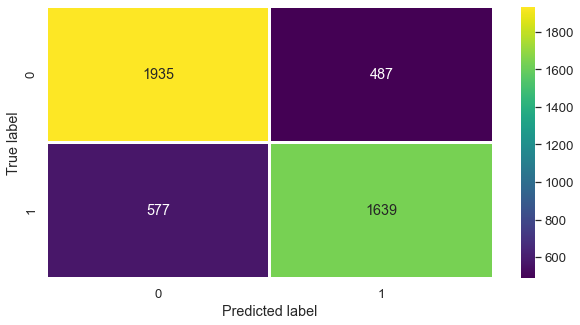

In [66]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [67]:
print(classification_report(y_test,ypred_lr))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2422
           1       0.77      0.74      0.75      2216

    accuracy                           0.77      4638
   macro avg       0.77      0.77      0.77      4638
weighted avg       0.77      0.77      0.77      4638



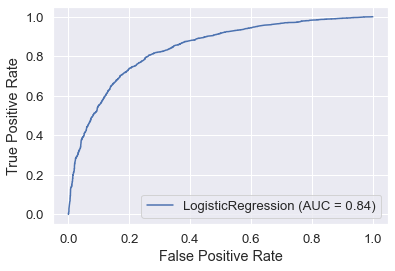

In [68]:
plot_roc_curve(lr,X_test,y_test)
plt.show()

In [69]:
accuracy_score(y_test,ypred_lr)

0.7705907718844329

In [70]:
#Cross Validation
cv = cross_val_score(lr,X.values,y.values,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [71]:
cv.mean()

0.7616874897646776

### Random Forest Classifier

In [72]:
rf = RandomForestClassifier(random_state=123)

In [73]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [74]:
ypred_rf = rf.predict(X_test)

In [75]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [76]:
ypred_rf[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

### Random Forest Model Evaluation

In [77]:
cm = confusion_matrix(y_test,ypred_rf)
cm

array([[1827,  595],
       [ 638, 1578]], dtype=int64)

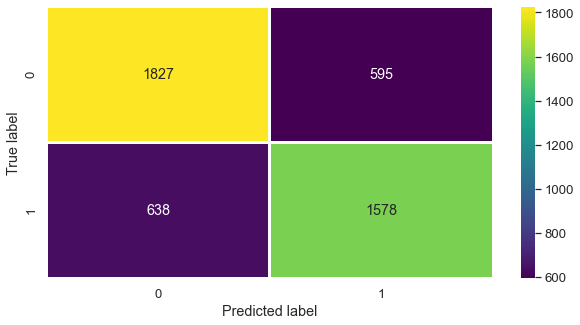

In [78]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [79]:
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      2422
           1       0.73      0.71      0.72      2216

    accuracy                           0.73      4638
   macro avg       0.73      0.73      0.73      4638
weighted avg       0.73      0.73      0.73      4638



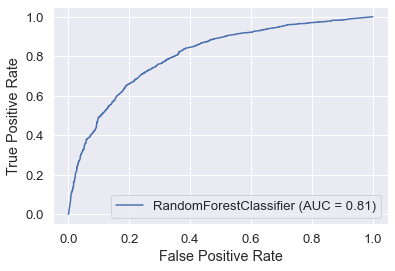

In [80]:
plot_roc_curve(rf,X_test,y_test)
plt.show()

In [81]:
accuracy_score(y_test,ypred_rf)

0.7341526520051747

In [82]:
#Cross Validation
cv = cross_val_score(rf,X.values,y.values,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s finished


In [83]:
cv.mean()

0.7286095222046864

### Gradient Boosting Classifer

In [84]:
gbc = GradientBoostingClassifier(random_state=123)

In [85]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=123)

In [86]:
ypredgbc = gbc.predict(X_test)

In [87]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [88]:
ypredgbc[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

### Gradient Boosting Model Evaluation

In [89]:
cm = confusion_matrix(y_test,ypredgbc)
cm

array([[1922,  500],
       [ 575, 1641]], dtype=int64)

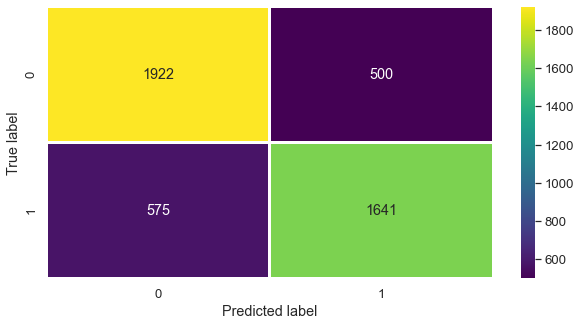

In [90]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [91]:
print(classification_report(y_test,ypredgbc))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2422
           1       0.77      0.74      0.75      2216

    accuracy                           0.77      4638
   macro avg       0.77      0.77      0.77      4638
weighted avg       0.77      0.77      0.77      4638



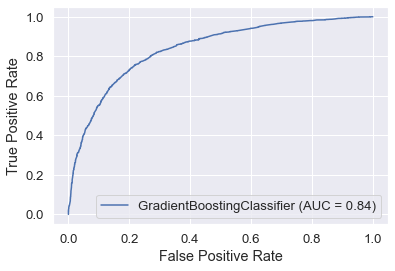

In [92]:
plot_roc_curve(gbc,X_test,y_test)
plt.show()

In [93]:
accuracy_score(y_test,ypredgbc)

0.7682190599396291

In [94]:
#Cross Validation
cv = cross_val_score(gbc,X.values,y.values,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.5s finished


In [95]:
cv.mean()

0.7619462405759476

### A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.

Logistic Regression gives us the best accuracy and F1 score. Therefore it is recommended and can be explained.

### Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.

The features we selected gave us a decent accuracy and good result. The result differences for all models are small and we select Logistic Regression because it's a simple model.

### Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

For features that are biased, we need to gather more data and made equal values for race, sex, income etc. We have to ensure the model we developed stays bias free.

We can also explore other models like decision tree, support vector machine, KNN classifiers model to see if they can able to analyse the data patterns to give better predictions. We also can adjust hyperparameters for each model to get better results.